In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy
from PIL import Image

In [14]:
train_ds = image_dataset_from_directory(
    "Banana FCN/Images",
    image_size = (128, 128),
    color_mode = 'rgb',
    labels = None
)

Found 82 files.


In [15]:
train_ds = train_ds.map(lambda x: tf.cast(x, tf.float32)/255.0)

In [16]:
mask_ds = image_dataset_from_directory(
    "Banana FCN/Mask",
    image_size = (128, 128),
    color_mode = 'grayscale',
    labels = None
)

Found 82 files.


In [17]:
mask_ds = mask_ds.map(lambda x: tf.cast(x, tf.float32)/255.0)

In [18]:
dataset = tf.data.Dataset.zip((train_ds,mask_ds))

In [19]:
inputs=Input((128,128,3))
x=layers.Conv2D(32,(3,3), activation='relu',padding='same')(inputs)
x=layers.MaxPooling2D((2,2))(x)
x=layers.Conv2D(64,(3,3), activation='relu', padding='same')(x)
x=layers.MaxPooling2D((2,2))(x)
x=layers.Conv2DTranspose(64,(3,3), strides=2, activation='relu', padding='same')(x)
x=layers.Conv2DTranspose(64,(3,3), strides=2, activation='relu', padding='same')(x)
outputs=layers.Conv2D(1,(1,1), activation='sigmoid')(x)
model=models.Model(inputs,outputs)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [21]:
model.fit(dataset, epochs = 2)

Epoch 1/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.5798 - loss: 0.6870
Epoch 2/2
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step - accuracy: 0.6731 - loss: 0.6532


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


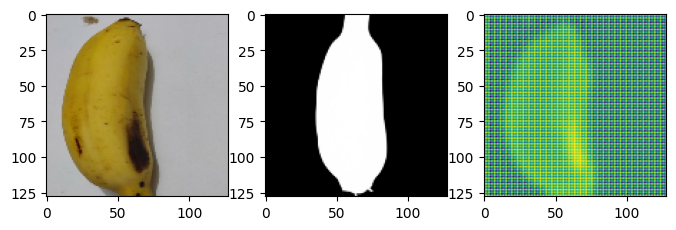

In [24]:
for images, masks in dataset.take(1):
    sample_image = images[0]
    true_masks = masks[0]
    pred_mask = model.predict(tf.expand_dims(sample_image,axis=0))[0]
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 3, 1)
    plt.imshow(sample_image)
    plt.subplot(1, 3, 2)
    plt.imshow(true_masks, cmap = 'gray')
    plt.subplot(1, 3, 3)
    plt.imshow(pred_mask)